# Project Reflection by Shoval, Karleen, and Gabriela


**UNITED STATES MEASLES OVERVIEW**

In [20]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

The following are the data files used to analyze data on measles cases in the United States. 

The 'total_unitedstates' representes CDC data on measles cases in each state of the United States through the year of 2024. In this file there is data on each state with columns for cases in total for the year and cases in this past week as of December 5, 2024. 

The next file 'weekly_cases' showcases CDC data on total number of measle cases each week from 2023 to December 5,2024 in the United States. 

Lastly, the file 'casesby_age' is data from the CDC as well representing measles cases through 7 different age groups (0-greater then 50). This data includes measles cases from 2020 to this year in the United States. 

These are the links from where this data was taken: 
- https://www.cdc.gov/measles/data-research/index.html#cdc_data_surveillance_section_5-yearly-measles-cases
- https://www.cdc.gov/mmwr/volumes/73/wr/mm7314a1.htm#T1_up

In [22]:
#Reading and showcasing csv data files
total_unitedstates = pd.read_csv('/home/gag002/gg/unitedcases.csv', delimiter=',')
print(total_unitedstates)

weekly_cases = pd.read_csv('/home/gag002/gg/weekly.csv', delimiter=',')
print(weekly_cases)

casesby_age = pd.read_csv('/home/gag002/gg/ages.csv', delimiter=',')
print(casesby_age)

               geography cases_range  cases_calendar_year  cases_thirty_days
0                Alabama           0                    0                  0
1                 Alaska           0                    0                  0
2                Arizona         1-9                    6                  0
3               Arkansas           0                    0                  0
4             California       10-19                   14                  0
5               Colorado           0                    0                  0
6            Connecticut           0                    0                  0
7               Delaware           0                    0                  0
8   District of Columbia         1-9                    1                  0
9                Florida       10-19                   13                  0
10               Georgia         1-9                    6                  0
11                Hawaii           0                    0                  0

Now continuing with the analysis. To begin we will do a general statistical analysis on the overall measles cases in the United States this past year. This includes data for cases found this year(2024) and cases within the last 30 days

In [34]:
print(total_unitedstates.describe())

       cases_calendar_year  cases_thirty_days
count            52.000000          52.000000
mean              5.442308           0.096154
std              13.716190           0.693375
min               0.000000           0.000000
25%               0.000000           0.000000
50%               1.000000           0.000000
75%               4.500000           0.000000
max              69.000000           5.000000


It can be concluded that on average in the United States minimal cases of measles were found with an average of around 5 cases this year. 

Now to continue we will be creating a plot including data from the top ten states with the most measles cases.
First we will make a table including this top ten, then we will make a bar plot to show the differences between the states. 

In [25]:
recent_cases = total_unitedstates[total_unitedstates['cases_thirty_days'] > 0]
print(recent_cases[['geography', 'cases_thirty_days']])


    geography  cases_thirty_days
23  Minnesota                  5


Minnesota is the only state in the past month to have reported measles cases. 
Now what are the top ten states with the most measles cases in the United States for 2024?

In [26]:
# Process data to extract the total number of cases for each state
total_unitedstates_sorted = total_unitedstates[['geography', 'cases_calendar_year']].copy()
total_unitedstates_sorted.rename(columns={'geography': 'State', 'cases_calendar_year': 'Total Cases'}, inplace=True)

# Convert cases to numeric and handle non-numeric data
total_unitedstates_sorted['Total Cases'] = pd.to_numeric(total_unitedstates_sorted['Total Cases'], errors='coerce')

# Sort to get top 10 states with the most cases
top_states_us = total_unitedstates_sorted.sort_values(by='Total Cases', ascending=False).head(10)

# Display the top 10 states as a printed table
print("Top 10 States with Most Measles Cases:")
print(top_states_us)

Top 10 States with Most Measles Cases:
            State  Total Cases
23      Minnesota           69
13       Illinois           67
38         Oregon           31
4      California           14
33  New York City           14
9         Florida           13
36           Ohio            7
48     Washington            7
22       Michigan            7
30     New Jersey            7


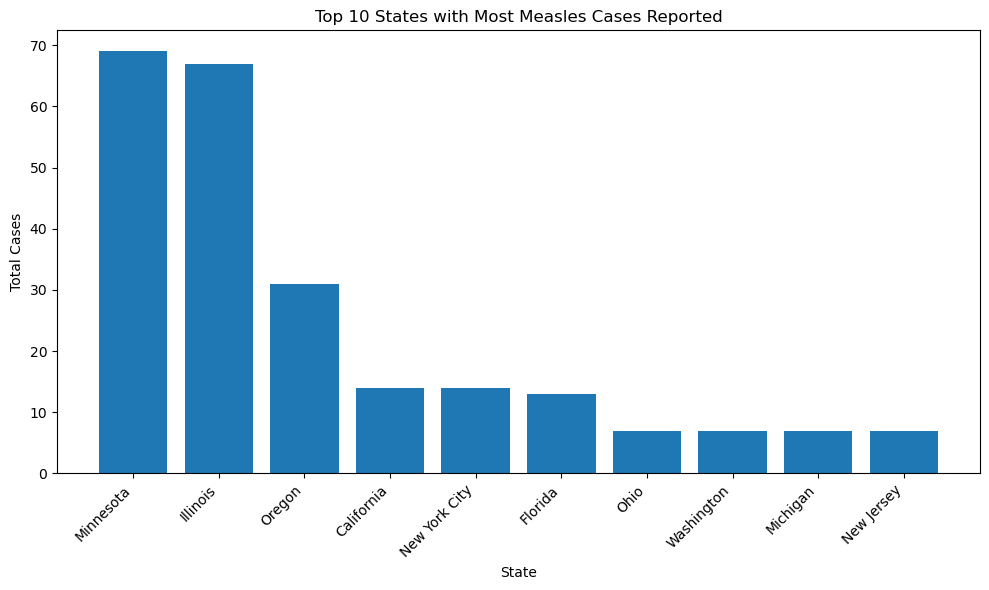

In [27]:
# Create a bar plot for the top 10 states
plt.figure(figsize=(10, 6))
plt.bar(top_states_us['State'], top_states_us['Total Cases'])
plt.title('Top 10 States with Most Measles Cases Reported')
plt.xlabel('State')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Now we know the top ten states with the most reported measles cases in the United States for 2024.

We will now begin to analyze the next file, 'weekly_cases'. Let's find out which week had the most measles cases reported. 

In [29]:
# Find the week with the maximum number of cases
week_with_most_cases = weekly_cases.loc[weekly_cases['cases'].idxmax()]

print("Week with the most cases:")
print(week_with_most_cases)

Week with the most cases:
week_start    2024-03-17
week_end      2024-03-23
cases                 38
Name: 63, dtype: object


The week with the most cases was in March of 2024 from dates 17-23.
Now lets see a line graph with the weekly reported cases these past two years in the United States. 

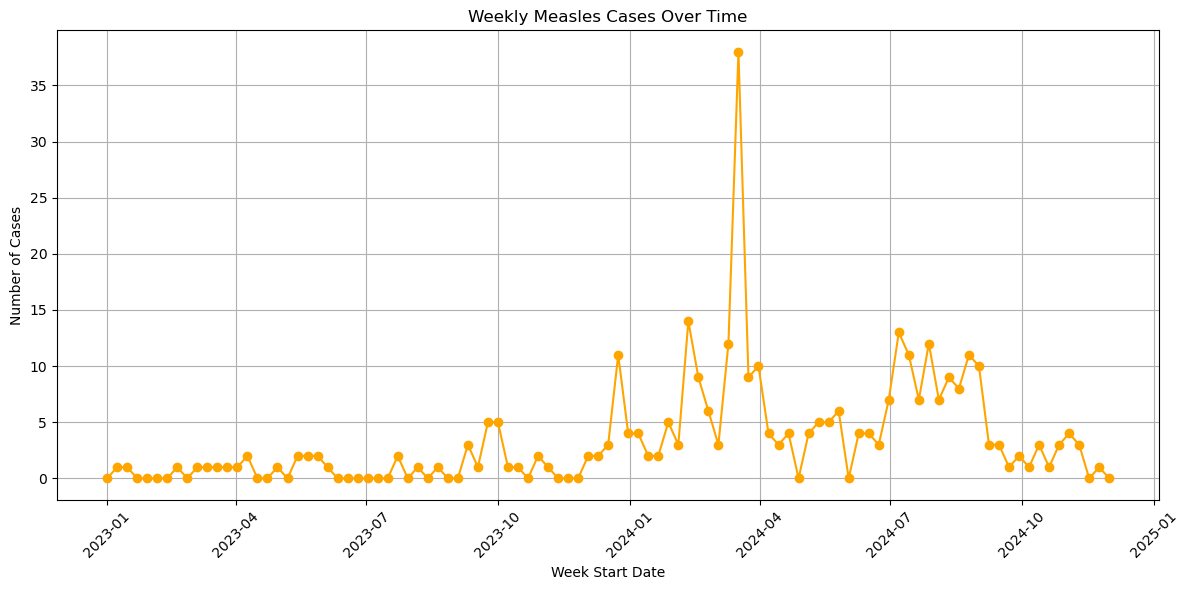

In [30]:
# Convert the 'week_start' column to datetime if not already in datetime format
weekly_cases['week_start'] = pd.to_datetime(weekly_cases['week_start'])

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(weekly_cases['week_start'], weekly_cases['cases'], marker='o', linestyle='-', color='orange')
plt.title('Weekly Measles Cases Over Time')
plt.xlabel('Week Start Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Now that we have seen the line graph lets look at a quick overview of the statistics behind this data on weekly measles cases in the United States for 2023 through 2024.

In [31]:
#Descriptive statistics
summary_stats = weekly_cases['cases'].describe()
print("Descriptive Statistics:")
print(summary_stats)

Descriptive Statistics:
count    101.000000
mean       3.386139
std        4.943623
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max       38.000000
Name: cases, dtype: float64


Lastly, let's analyze the data under 'casesby_age'. Let's begin by, looking into the trend of total cases across the years (2020-now). 

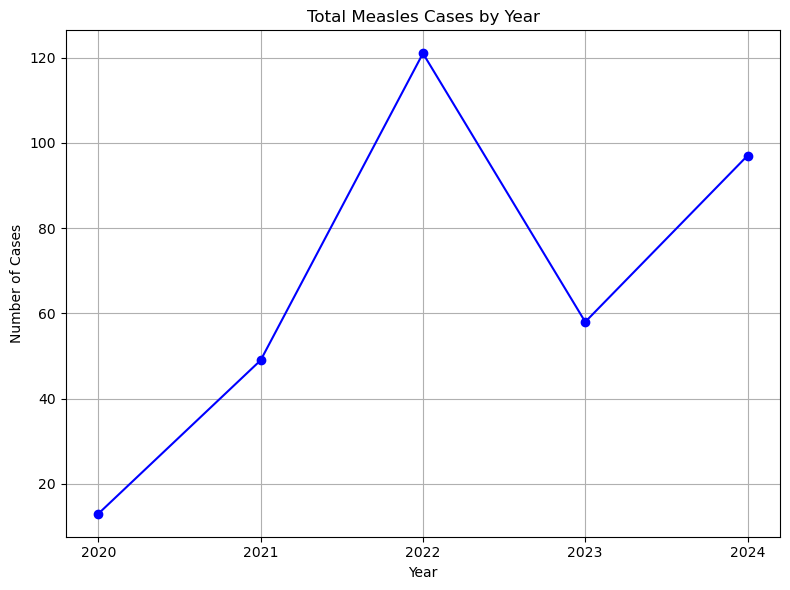

In [32]:
# Cases by year
years = ['2020', '2021', '2022', '2023', '2024']
total_cases = casesby_age.loc[0, years].astype(int)

# Plot 
plt.figure(figsize=(8, 6))
plt.plot(years, total_cases, marker='o', linestyle='-', color='blue')
plt.title('Total Measles Cases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.grid(True)
plt.tight_layout()
plt.show()

analysis... 

Now let's see the specific cases in 2024 by the age groups. 

In [33]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(cases_2024, labels=age_groups, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Percentage of Cases by Age Group in 2024')
plt.tight_layout()
plt.show()


NameError: name 'cases_2024' is not defined

<Figure size 800x800 with 0 Axes>

analysis... 

Now lets stack bar plot to see the relationship between the years and the age groups with reported measles cases. 

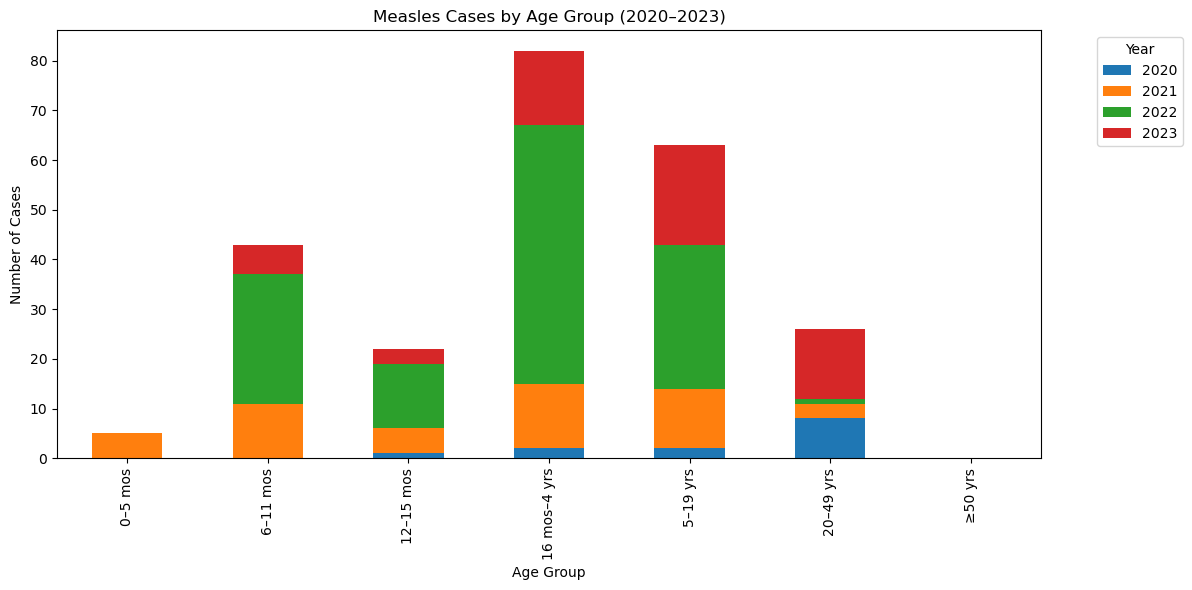

In [35]:
# Extract data for 2020–2023 by age group
cases_2020_2023 = casesby_age[['2020', '2021', '2022', '2023']][1:].astype(int)

# Stacked bar chart
cases_2020_2023.index = casesby_age['Characteristic'][1:]
cases_2020_2023.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Measles Cases by Age Group (2020–2023)')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


analysis..

**MEASLES VACCINATION COVERAGE IN THE UNITED STATES**

The following are the data files used to analyze data on measles cases in the United States.

The 'percent_vaccinated' file includes CDC data on the United States from 2009-2024. This is specific on data on kindergarteners by the school year that recieved the MMR vaccine. 

The next file 'mmr_coverage' is CDC data specifically on the measles, mumps, rubella (MMR) vaccination coverage by two years of age. This focuses on the vaccination coverage in the United States from 2010-2026 classified by race, poverty levels, and location of residence. 

These are the links from where this data was taken:

- https://www.cdc.gov/measles/data-research/index.html#cdc_data_surveillance_section_5-yearly-measles-cases
- https://www.cdc.gov/nchs/fastats/measles.htm

In [36]:
#Reading and showcasing csv data files
percent_vaccinated = pd.read_csv('/home/gag002/gg/vaccine.csv', delimiter=',')
print(percent_vaccinated)

mmr_coverage = pd.read_csv('/home/gag002/gg/MMRvaccination_coverage.csv', delimiter=',')
print(mmr_coverage)

         geography school_year estimate_pct  population_size  \
0          Alabama     2023-24        93.8%          54565.0   
1           Alaska     2023-24        84.3%           8644.0   
2          Arizona     2023-24        89.3%          74834.0   
3         Arkansas     2023-24        92.5%          37535.0   
4       California     2023-24        96.2%         569680.0   
..             ...         ...          ...              ...   
764       Virginia     2009-10        92.1%         100891.0   
765     Washington     2009-10        91.7%          81511.0   
766  West Virginia     2009-10        91.2%          22730.0   
767      Wisconsin     2009-10        94.2%          61095.0   
768        Wyoming     2009-10          NaN              NaN   

     percent_surveyed                          survey_type     categories  
0               100.0                               Census       90-94.9%  
1                88.9  Census (pub.), Not Conducted (prv.)  Less than 90%  
2  

Let's first begin by analyzing the 'percent_vaccinated' data file. We will first look at

In [41]:
# Preprocessing: Convert 'estimate_pct' to numeric by removing '%' and converting to float
percent_vaccinated['estimate_pct'] = percent_vaccinated['estimate_pct'].str.replace('%', '').astype(float)

# Statistics: Calculate summary statistics for vaccination rates
summary_stats = percent_vaccinated['estimate_pct'].describe()

# Count states in each vaccination category
category_counts = percent_vaccinated['categories'].value_counts()

# Display summary statistics and category counts
summary_stats, category_counts


(count    681.000000
 mean      93.588253
 std        3.383791
 min       78.000000
 25%       91.800000
 50%       94.000000
 75%       96.200000
 max       99.900000
 Name: estimate_pct, dtype: float64,
 categories
 90-94.9%         326
 95%+             261
 Less than 90%     94
 Name: count, dtype: int64)

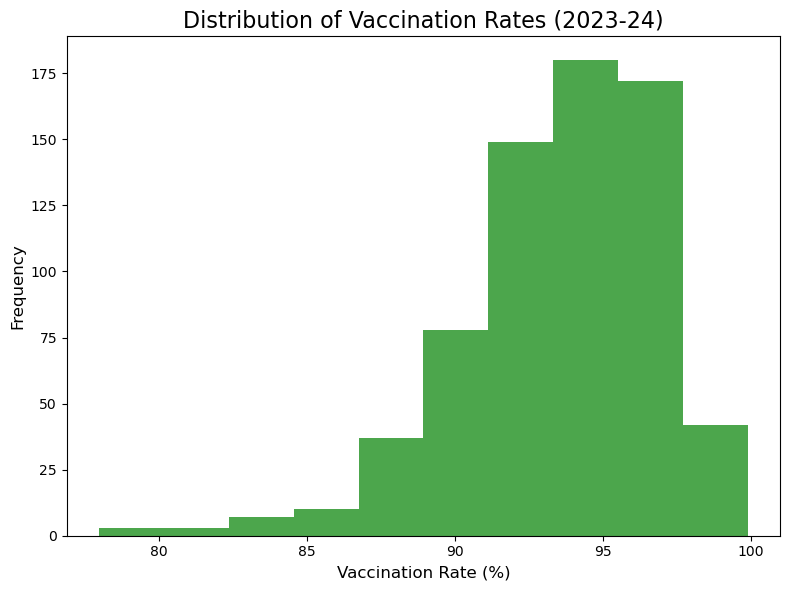

In [47]:
# Histogram: Distribution of vaccination rates
plt.figure(figsize=(8, 6))
plt.hist(percent_vaccinated['estimate_pct'], bins=10, color='green', alpha=0.7)
plt.title("Distribution of Vaccination Rates (2023-24)", fontsize=16)
plt.xlabel("Vaccination Rate (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()


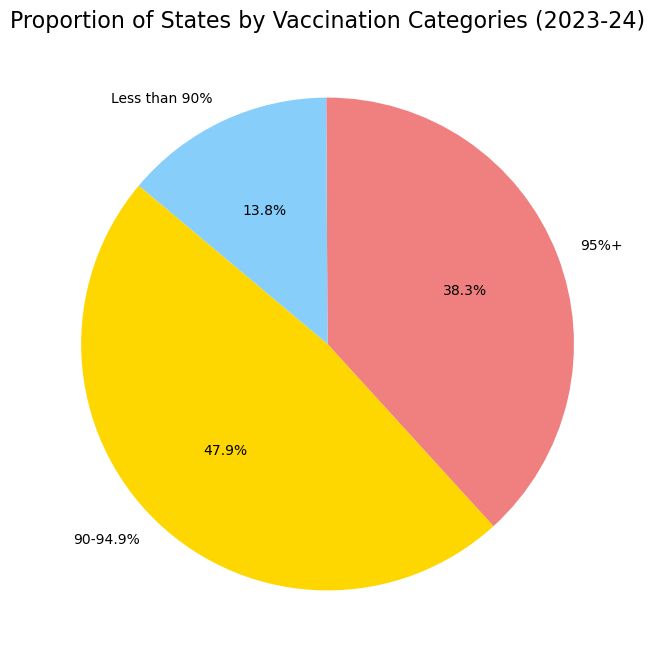

In [45]:
# Pie chart: Proportion of states in each vaccination category
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title("Proportion of States by Vaccination Categories (2023-24)", fontsize=16)
plt.show()

Now we will be analyzing the 'mmr_coverage' data file. We will first look at